In [39]:
# A data frame with 53940 rows and 10 variables:
# price: price in US dollars (\$326--\$18,823)
# carat: weight of the diamond (0.2--5.01)
# cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# color: diamond colour, from J (worst) to D (best)
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
# x: length in mm (0--10.74)
# y: width in mm (0--58.9)
# z: depth in mm (0--31.8)
# depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
# table: width of top of diamond relative to widest point (43--95)

In [40]:
# what is the type of features in our dataset ?
# Is there any null value present in our dataset ?
# Are there any outliers present in our dataset ?
# find different types of relationship among different variables ?
# --> by categorical-numerical analysis
# -->by categorical-categorical analysis
# visualisation of dataset
# training of model
# testing of model



In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('diamonds.csv')

In [43]:
df=df.drop('Unnamed: 0',axis=1)

In [44]:
print(df.head(10))

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


<ipython-input-45-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

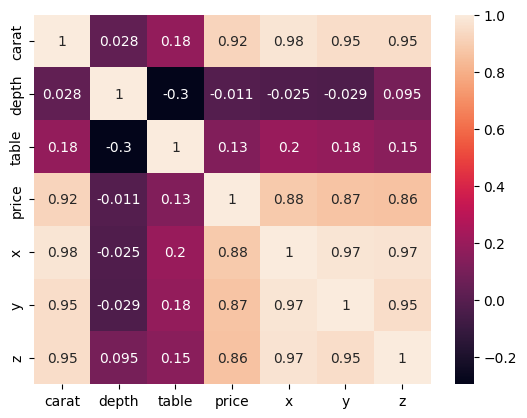

In [45]:
sns.heatmap(df.corr(),annot=True)


In [46]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In this dataset,there are three categorical and rest are numerical features.

In [47]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [48]:
df['color']=df['color'].map({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})
df['cut']=df['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
df['clarity']=df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,3.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,0.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,2.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,5.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [49]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,5,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,5,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,5,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,1,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,0,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,6,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,2,2,61.0,58.0,2757,6.15,6.12,3.74


In [50]:
carat_cut=df.groupby('cut')['price'].sum()
carat_cut

cut
1     7017600
2    19275009
3    48107623
4    63221498
5    74513487
Name: price, dtype: int64

In [51]:
pd.crosstab(df['cut'],df['color'])

color,0,1,2,3,4,5,6
cut,,,,,,,
1,119,175,303,314,312,224,163
2,307,522,702,871,909,933,662
3,678,1204,1824,2299,2164,2400,1513
4,808,1428,2360,2924,2331,2337,1603
5,896,2093,3115,4884,3826,3903,2834


In [52]:
df.corr()['price'].sort_values(ascending=False)

price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
table      0.127134
depth     -0.010647
cut       -0.053491
clarity   -0.146800
color     -0.172511
Name: price, dtype: float64

In [53]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [54]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,3.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,0.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,2.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,5.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [55]:

for x in ['x','y','z']:
  df=df[(df[x]!=0)]


No zero value present in dimension because it actually not possible.



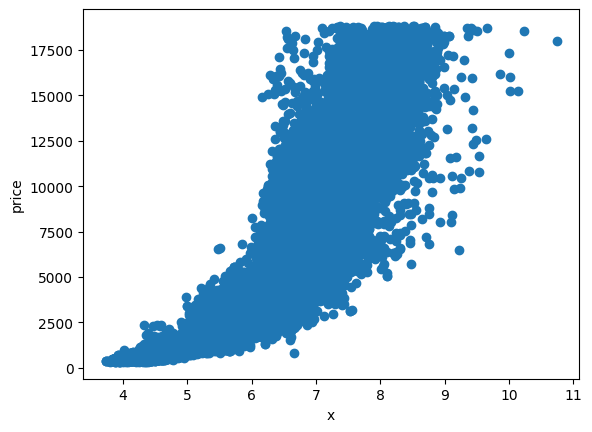

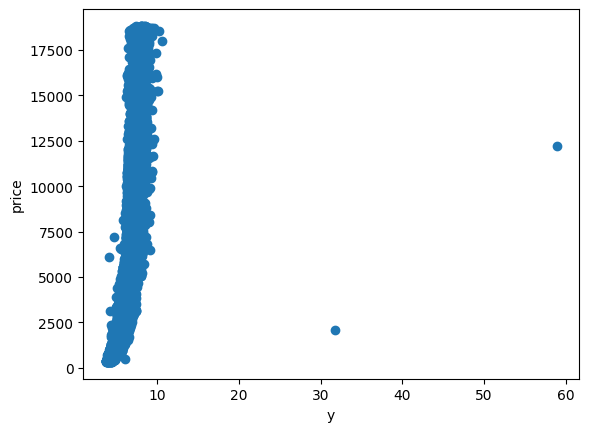

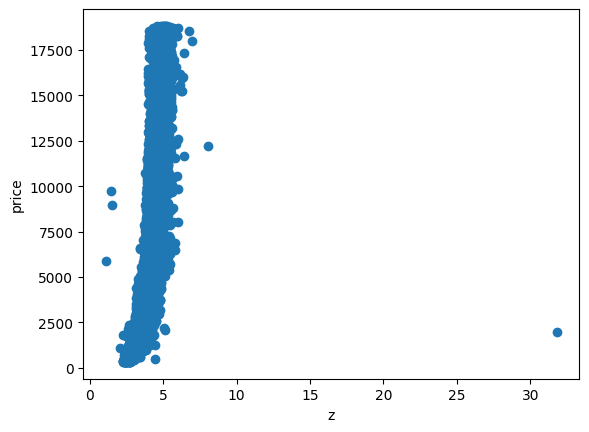

In [56]:
value=['x','y','z']
for x in value:
  plt.scatter(x=df[x],y=df['price'])
  plt.xlabel(x)
  plt.ylabel('price')
  plt.show()

from this figure,it seem clear that price increases with the dimension of diamond.

In [57]:
range_value=['carat','depth','table','price','x','y','z']

In [58]:
for x in range_value:
  print(x,'->',df[x].skew())

carat -> 1.1162074750825512
depth -> -0.08172649837750892
table -> 0.7967994917187979
price -> 1.6183486340820077
x -> 0.39834750049248013
y -> 2.4622106083021604
z -> 1.5854897667150878


from here,we conclude that **carat** , **price** ,**y** and **z** are right skewed.

In [59]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,3.904228,3.405972,4.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.116579,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,1.000000,0.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,3.000000,2.000000,3.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,5.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


I have done feature transformation on features because they are skewed


In [60]:
df.skew()

carat      1.116207
cut       -0.717188
color     -0.189630
clarity    0.551471
depth     -0.081726
table      0.796799
price      1.618349
x          0.398348
y          2.462211
z          1.585490
dtype: float64

In [61]:
for x in range_value:
  print(x,'-->',df[x].skew())

carat --> 1.1162074750825512
depth --> -0.08172649837750892
table --> 0.7967994917187979
price --> 1.6183486340820077
x --> 0.39834750049248013
y --> 2.4622106083021604
z --> 1.5854897667150878


In [62]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,3.904228,3.405972,4.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.116579,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,1.000000,0.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,3.000000,2.000000,3.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,5.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [63]:
no_out=0
for x in range_value:
  df[x].sort_values(ascending=True)

  # Specify the column you want to analyze for outliers
  column_name = x

  # Calculate the first quartile (Q1) and third quartile (Q3)
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)

  # Calculate the IQR (Interquartile Range)
  IQR = Q3 - Q1

  # Define the upper and lower bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Count the number of outliers
  outliers_count = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])
  no_out=no_out+outliers_count
  # Display the number of outliers
  print("Number of outliers:",x,'->', outliers_count)


print(no_out)

Number of outliers: carat -> 1883
Number of outliers: depth -> 2543
Number of outliers: table -> 604
Number of outliers: price -> 3532
Number of outliers: x -> 24
Number of outliers: y -> 22
Number of outliers: z -> 29
8637


**Removing Outliers**

In [64]:
for x in range_value:
  df[x].sort_values(ascending=True)

  # Specify the column you want to analyze for outliers
  column_name = x

  # Calculate the first quartile (Q1) and third quartile (Q3)
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)

  # Calculate the IQR (Interquartile Range)
  IQR = Q3 - Q1

  # Define the upper and lower bounds for outliers
  lower= Q1 - 1.5 * IQR
  upper= Q3 + 1.5 * IQR
  df=df[df[x].between(lower,upper)]


In [65]:
x=df.drop('price',axis=1)
y=df['price']

In [66]:
pip install --upgrade scikit-learn


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [68]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


model = LinearRegression()

# Now you can use the 'model' object for training, prediction, etc.


In [69]:

# model=RandomForestRegressor()
# model=SVR()



In [70]:

model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))


529.4841062255141
578963.2845928775
760.8963691547473


In [72]:
data={'y_test':y_test,'y_pred':y_pred,'diff':y_pred-y_test}
df2=pd.DataFrame(data)
df2

,y_test,y_pred,diff
19739,8311,6609.368601,-1701.631399
19941,8489,6647.093263,-1841.906737
47146,1832,2494.436008,662.436008
17596,7085,7021.168828,-63.831172
53275,2649,2761.590969,112.590969
...,...,...,...
42609,505,11.937185,-493.062815
11367,4997,4850.639048,-146.360952
51913,2436,2601.671677,165.671677
32516,798,458.390586,-339.609414


In [73]:
import pickle
filename = 'diamond_price_model2.pkl'
pickle.dump(model, open(filename, 'wb'))


In [74]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(x_test, y_test)
# print(result)

In [75]:
# import bz2
# import pickle

# def save_compressed_pickle(model, filename):
#   """Saves a model object to a compressed pickle file.

#   Args:
#       model: The machine learning model object to save.
#       filename: The filename to save the compressed pickle file.
#   """
#   with bz2.open(filename, 'wb') as f:
#     pickle.dump(model, f)

# # Assuming you have your trained diamond price model in a variable named 'model'
# filename = 'diamond_price_model1.pkl'
# save_compressed_pickle(model, filename)